# Columns
Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: indicates the function which scores likelihood of diabetes based on family history: it provides a synthesis of the diabetes mellitus history in relatives and the genetic relationship of those relatives to the subject

Age: Age (years)

Outcome: Class variable (0 or 1)

all patients here are females 

# Import Python Libraries

In [3]:
# objects for multidimensional arrays and matrices, and functions that perform advanced mathematical and statistical operations on those objects

import numpy as np

# Adds data structures and tools designed to work with table-like data and handling missing data
import pandas as pd

# library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Provides high level interface for drawing attractive statistical graphics
import seaborn as sns

In [4]:
# Read the dataset
data = pd.read_csv('diabetes.csv')

# Exploring the data

In [5]:
data.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [6]:
# Number of(rows, columns)
data.shape

(768, 9)

In [7]:
# Check types for all the columns
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
data.describe().transpose()

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [9]:
# Check if their is any duplicaed rows
isDuplicated = data[data.duplicated()]
isDuplicated

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

<AxesSubplot: >

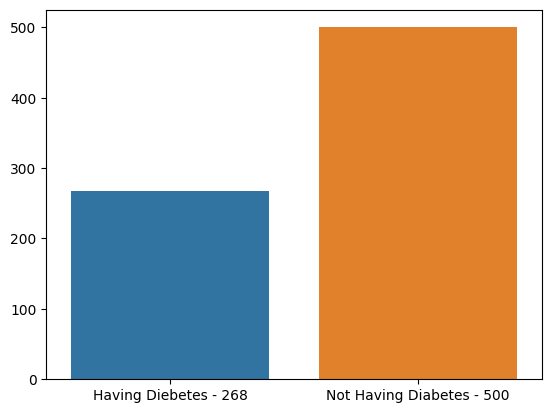

In [10]:
having_diabetes = data[data["Outcome"]==1]
not_having = data[data["Outcome"]==0]

sns.barplot(x=['Having Diebetes - '+ str(len(having_diabetes)),'Not Having Diabetes - '+ str(len(not_having))],
            y= [len(having_diabetes),len(not_having)] )

## Observing the distribution of data

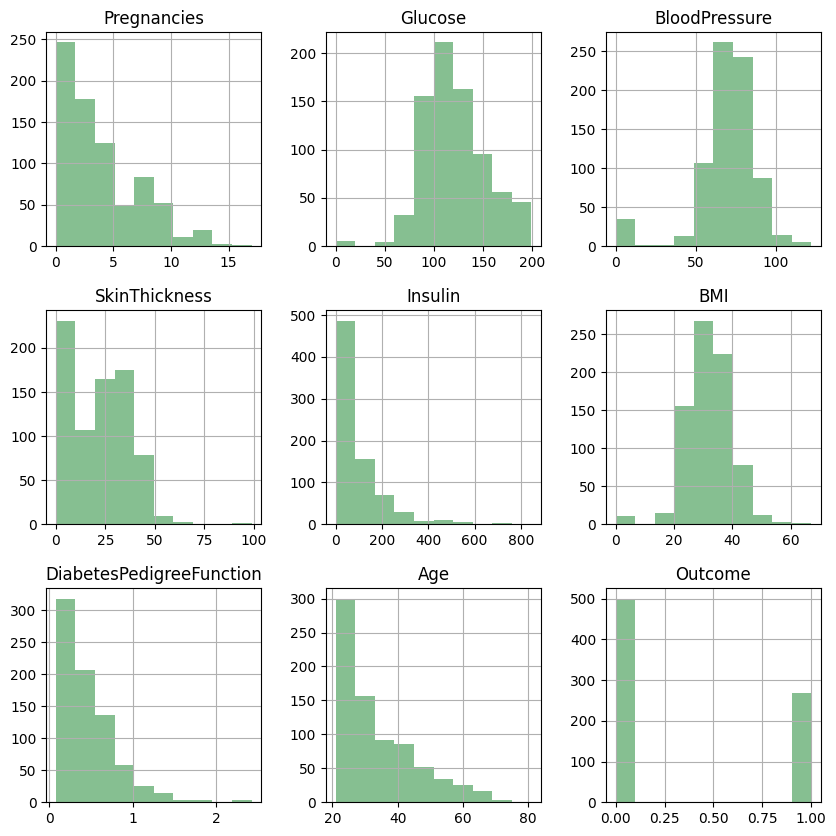

In [11]:
data.hist(bins=10, color='#86bf91', figsize=(10,10))
plt.show()

In [12]:
# Number of missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Preprocessing

In [13]:
# Replacing zeros with NaN
colsWithZeros = ["Insulin", "Glucose","BloodPressure", "BMI", "SkinThickness" ]

for col in colsWithZeros:
    data[col] = data[col].replace(0, np.NaN)
    
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
# Using median to replace nan for skewed data, and using mean to replace nan for normaly distributed data


from sklearn.impute import SimpleImputer


imputerMean = SimpleImputer(missing_values=np.nan, strategy='mean')
data.loc[:,['Glucose','BloodPressure','BMI']] = imputerMean.fit_transform(data.loc[:,['Glucose','BloodPressure','BMI']])  


imputerMedian = SimpleImputer(missing_values=np.nan, strategy='median')
data.loc[:,['SkinThickness','Insulin']] = imputerMedian.fit_transform(data.loc[:,['SkinThickness','Insulin']])  


data.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0             6    148.0      72.000000           35.0    125.0  33.600000   
1             1     85.0      66.000000           29.0    125.0  26.600000   
2             8    183.0      64.000000           29.0    125.0  23.300000   
3             1     89.0      66.000000           23.0     94.0  28.100000   
4             0    137.0      40.000000           35.0    168.0  43.100000   
5             5    116.0      74.000000           29.0    125.0  25.600000   
6             3     78.0      50.000000           32.0     88.0  31.000000   
7            10    115.0      72.405184           29.0    125.0  35.300000   
8             2    197.0      70.000000           45.0    543.0  30.500000   
9             8    125.0      96.000000           29.0    125.0  32.457464   
10            4    110.0      92.000000           29.0    125.0  37.600000   
11           10    168.0      74.000000           29.0    125.0  38.000000   
12           10    139.0      80.000000           29.0    125.0  27.100000   
13            1    189.0      60.000000           23.0    846.0  30.100000   
14            5    166.0      72.000000           19.0    175.0  25.800000   
15            7    100.0      72.405184           29.0    125.0  30.000000   
16            0    118.0      84.000000           47.0    230.0  45.800000   
17            7    107.0      74.000000           29.0    125.0  29.600000   
18            1    103.0      30.000000           38.0     83.0  43.300000   
19            1    115.0      70.000000           30.0     96.0  34.600000   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

# Detecting outliers

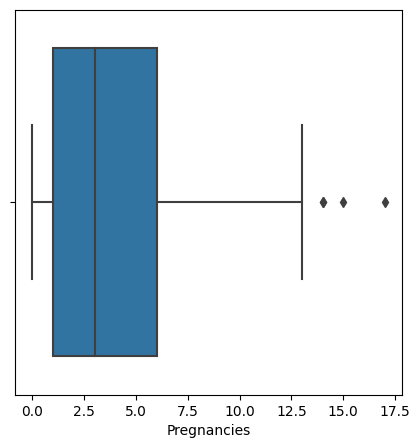

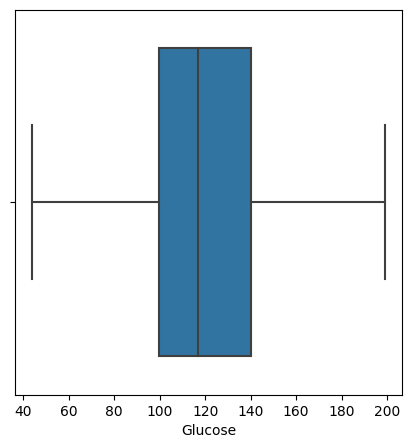

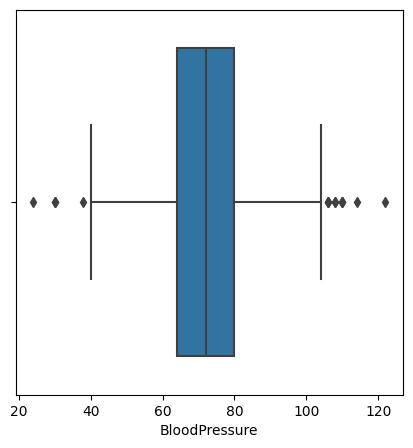

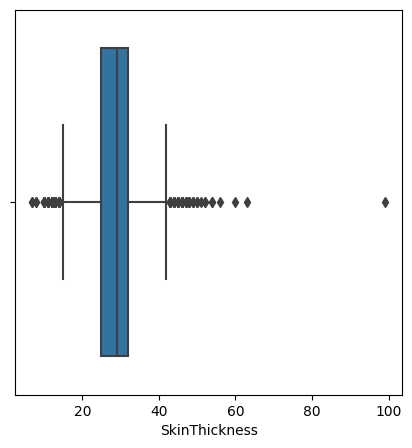

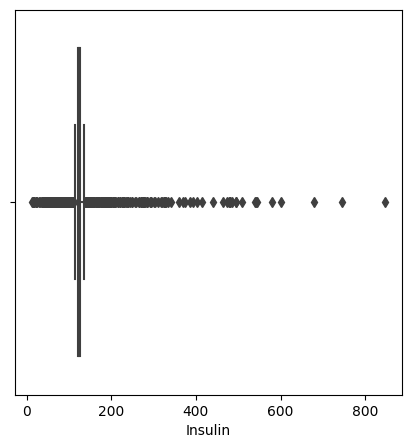

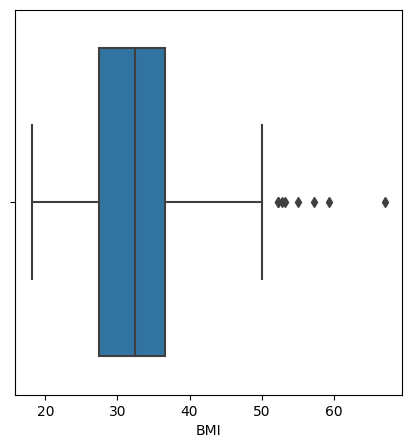

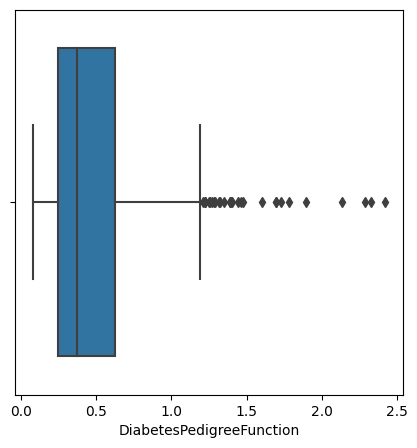

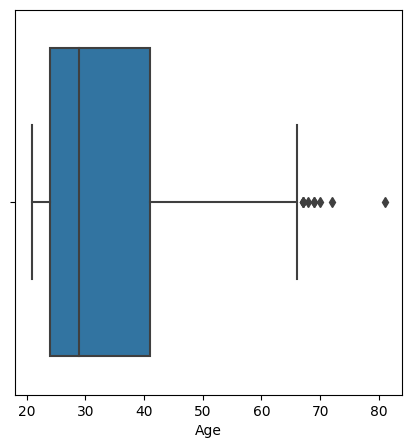

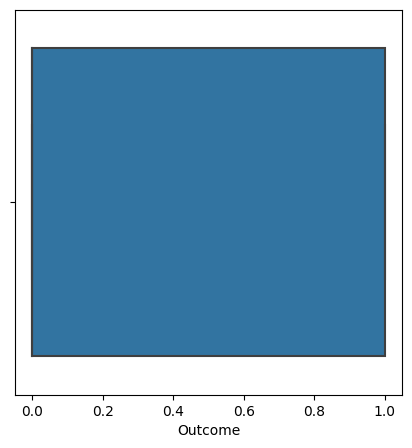

In [15]:
for col in data.columns:
    fig = plt.figure(figsize=(5,5))
    sns.boxplot(x=data[col])
    plt.xlabel(col, fontsize=10)
    plt.show()

## Reduceing the impact of outliers

In [175]:
from sklearn.preprocessing import QuantileTransformer

for col in data.iloc[:,:-1]:
    colBeforeTransform = data[[col]].values
    data[col] = QuantileTransformer(n_quantiles=768).fit_transform(colBeforeTransform)

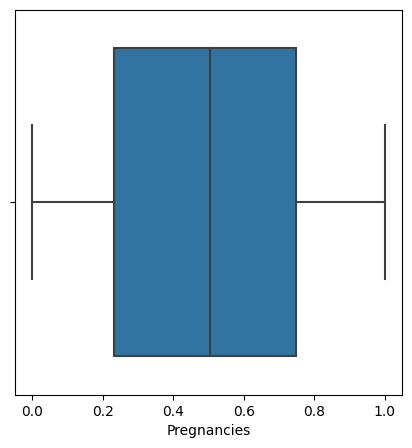

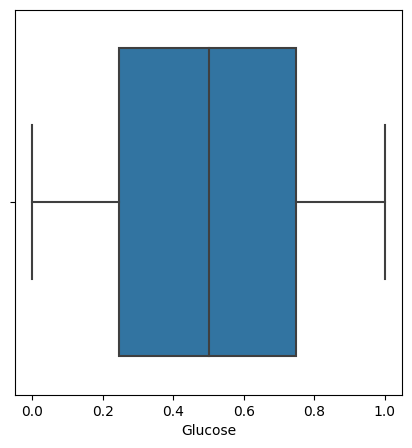

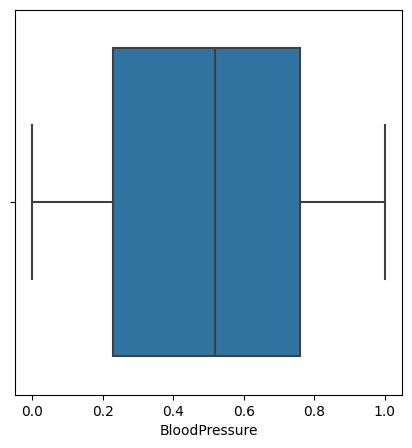

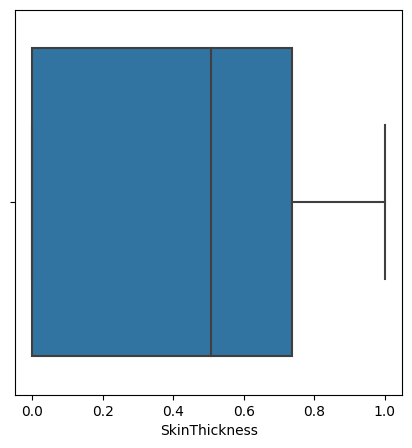

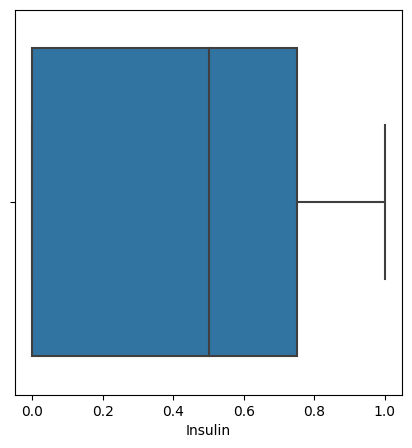

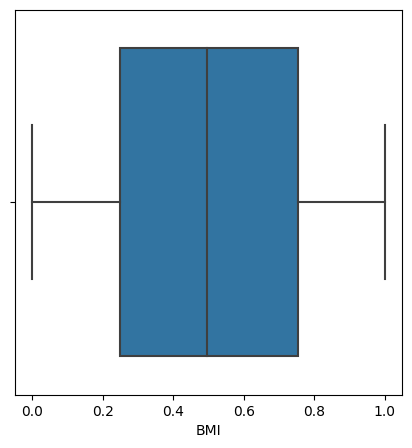

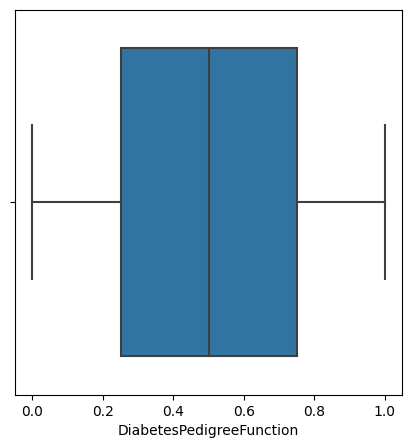

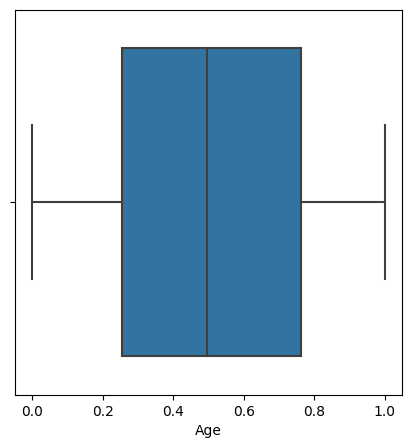

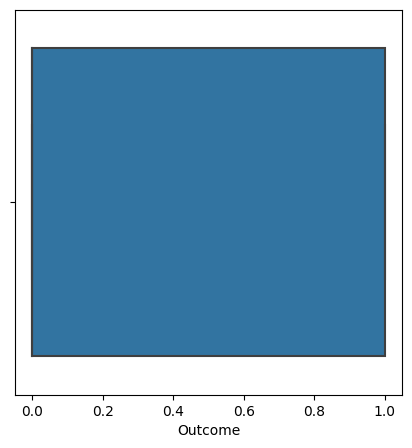

In [176]:
for col in data.columns:
    fig = plt.figure(figsize=(5,5))
    sns.boxplot(x=data[col])
    plt.xlabel(col, fontsize=10)
    plt.show()

In [131]:
# Calculating the number of outliers 

for column in data.columns[:-1]:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_range = (data[column] < (Q1 - 1.5*IQR)) | (data[column] > (Q3 + 1.5 * IQR))
    num_outliers = data[column][outlier_range].count()
    
    print(f"{column}: {num_outliers} outliers")
    

Pregnancies: 0 outliers
Glucose: 0 outliers
BloodPressure: 0 outliers
SkinThickness: 0 outliers
Insulin: 0 outliers
BMI: 0 outliers
DiabetesPedigreeFunction: 0 outliers
Age: 0 outliers


<Figure size 1200x1000 with 0 Axes>

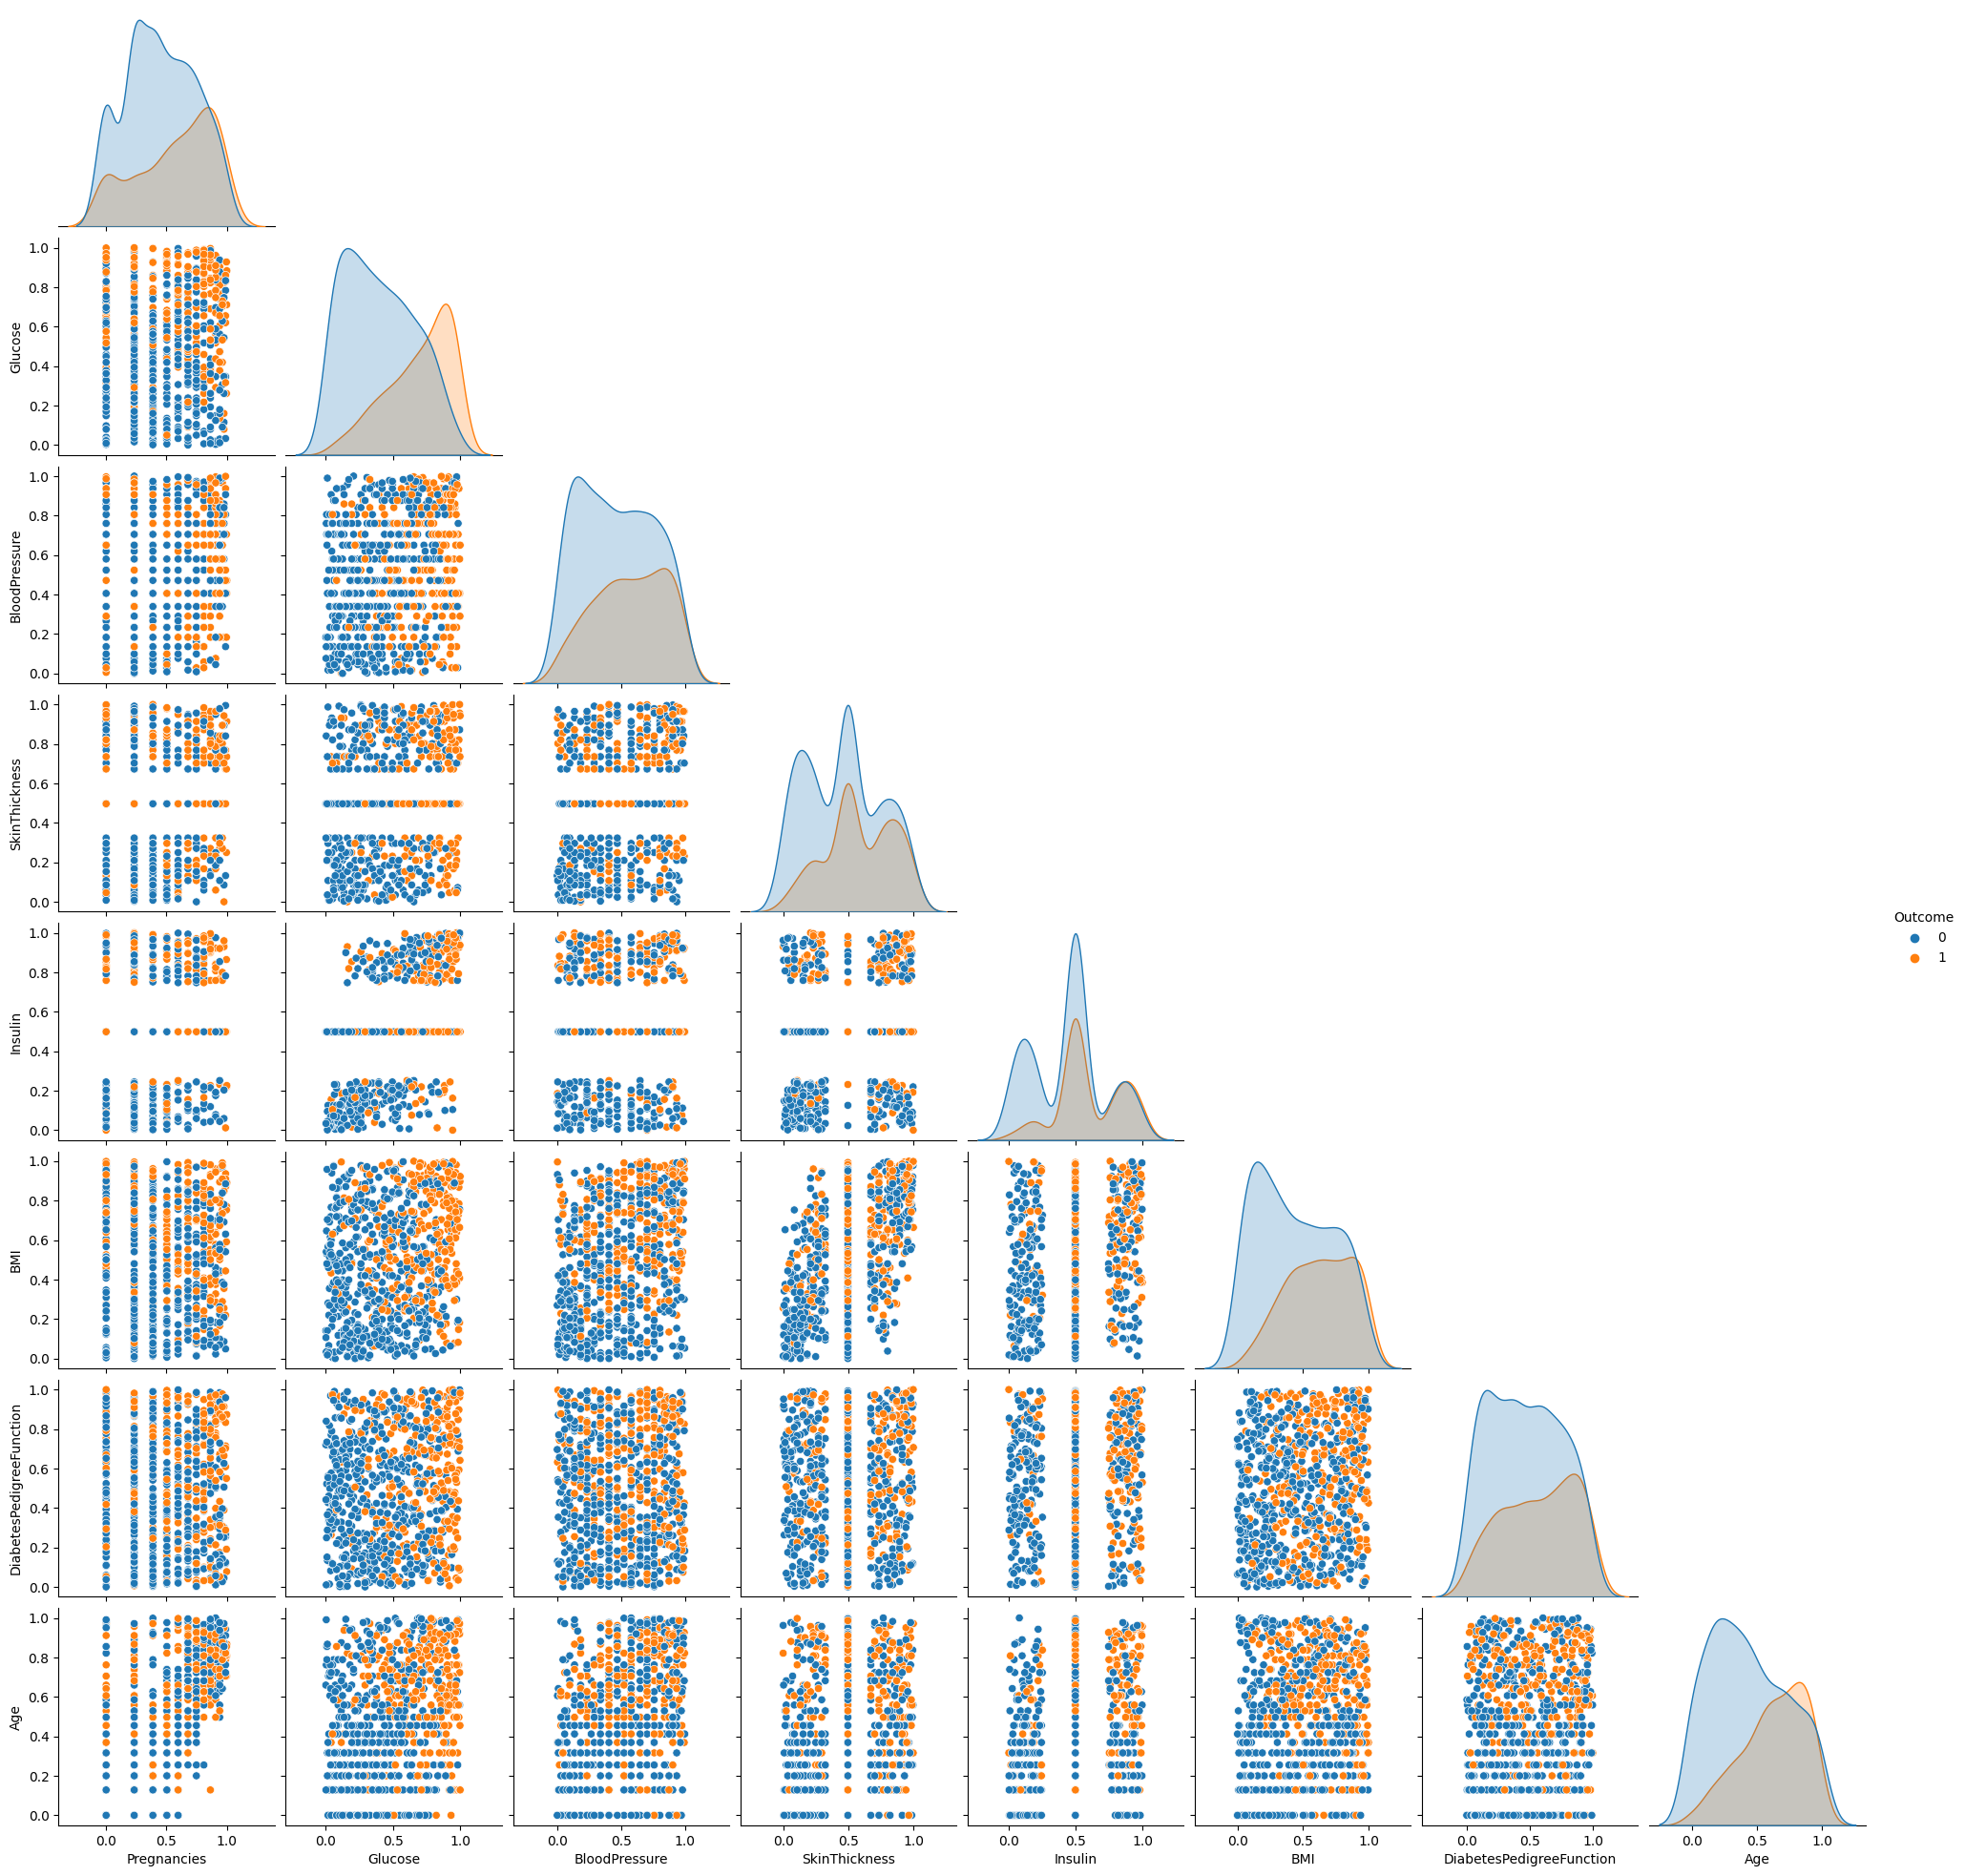

In [161]:
# Using pairplot to show relationships between features and individual distributions
plt.figure(figsize=(12, 10))
sns.pairplot(data=data, hue="Outcome", corner=True)
plt.show()

### It is clear from the above pairplot that Glucose level plays the most important role than any other feature.

# Model development

In [133]:
# Independant and Dependant features
x = data.drop('Outcome',axis=1)
y = data['Outcome']

In [134]:
x.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.747718  0.810300       0.471317       0.801825  0.498696  0.591265   
1     0.232725  0.091265       0.290091       0.496741  0.498696  0.213168   
2     0.863755  0.956975       0.233377       0.496741  0.498696  0.077575   
3     0.232725  0.124511       0.290091       0.209909  0.175359  0.284224   
4     0.000000  0.721643       0.005215       0.801825  0.834420  0.926988   

   DiabetesPedigreeFunction       Age  
0                  0.750978  0.889831  
1                  0.475880  0.558670  
2                  0.782269  0.585398  
3                  0.106258  0.000000  
4                  0.997392  0.606258

In [135]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [180]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

## 1. Decision Tree

In [181]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')

# Fit dt to the training set
dt.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [182]:
# Evaluate the classification tree

y_pred = dt.predict(x_test)

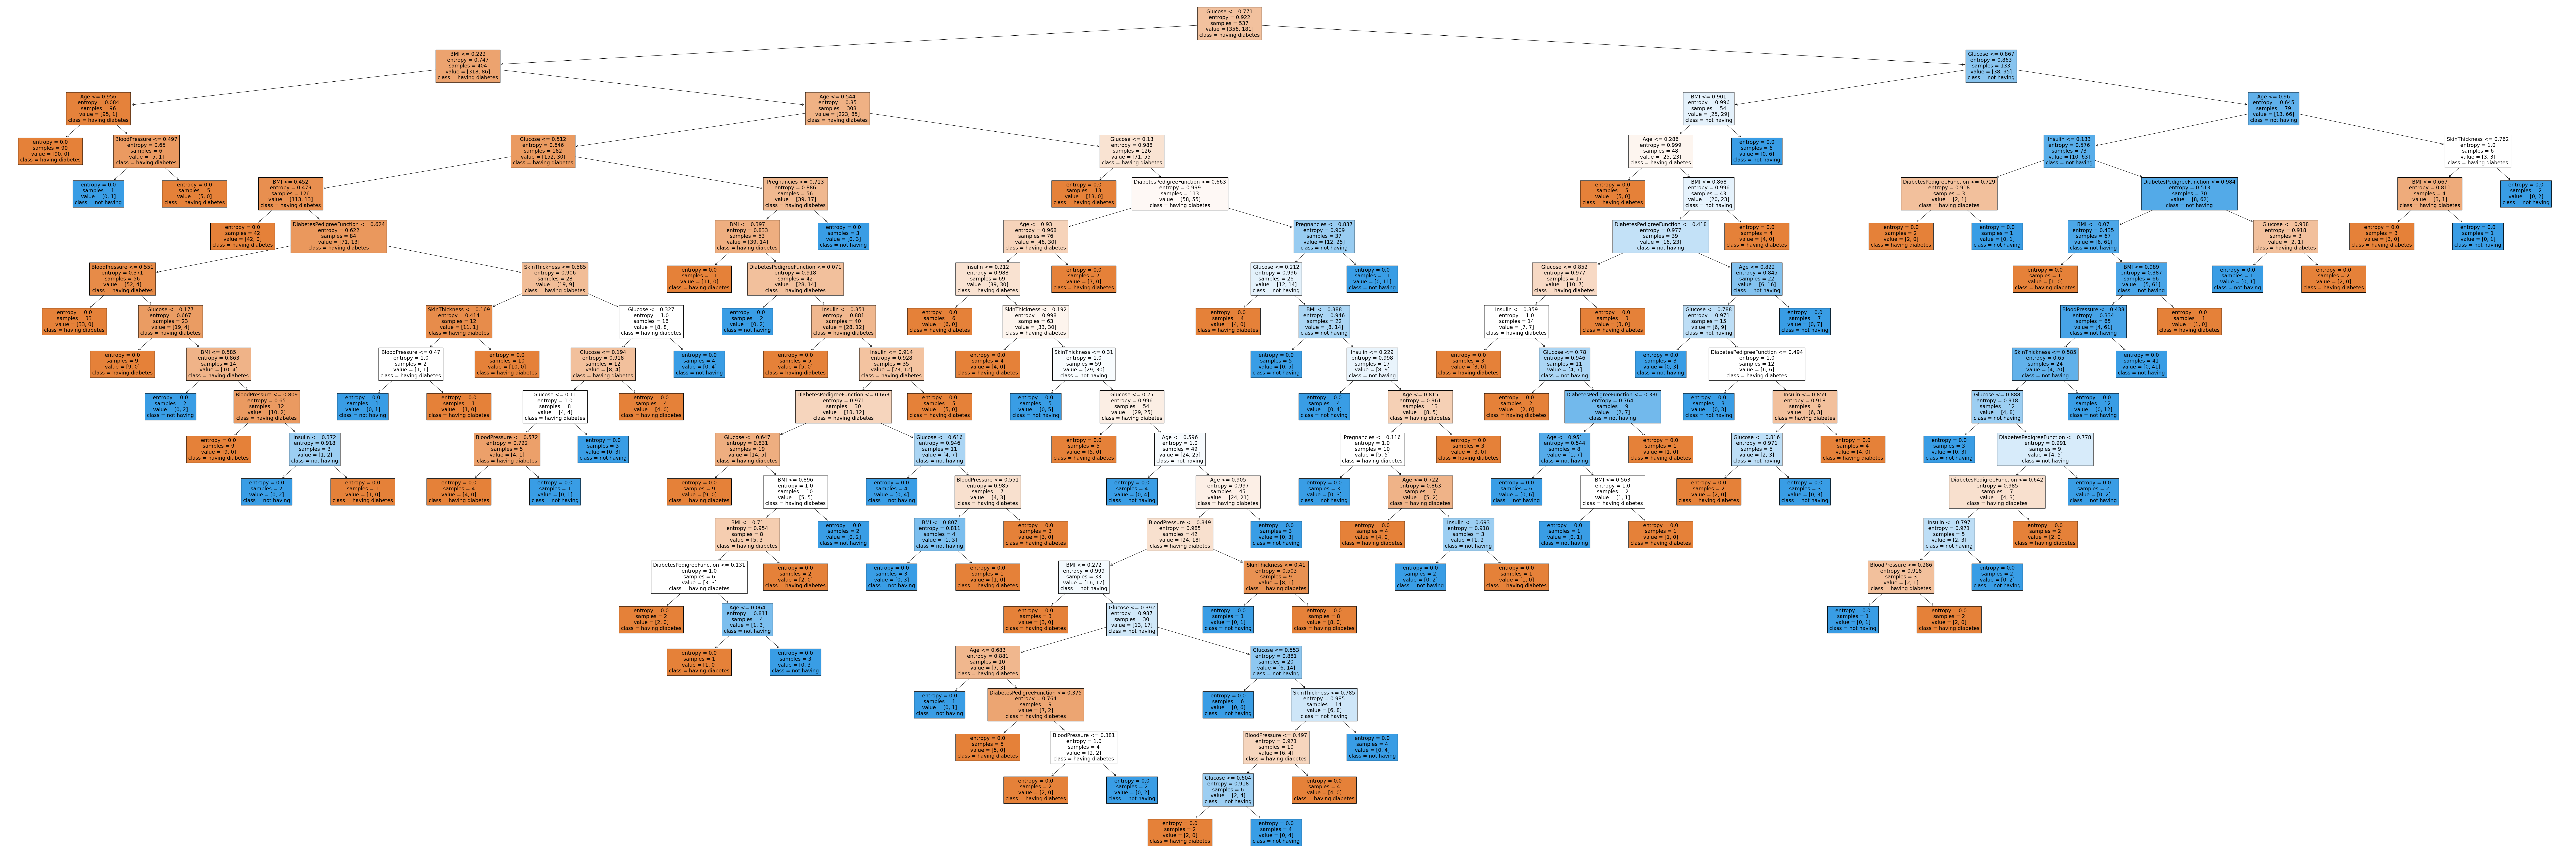

In [186]:
from sklearn.tree import plot_tree

class_names=['having diabetes','not having']
fig = plt.figure(figsize=(150,50))
tree= plot_tree(dt, 
                   feature_names=data.columns[:-1],  
                   class_names=class_names,
                   filled=True)


### Evaluate the decision tree

In [140]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, precision_score, f1_score, recall_score

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

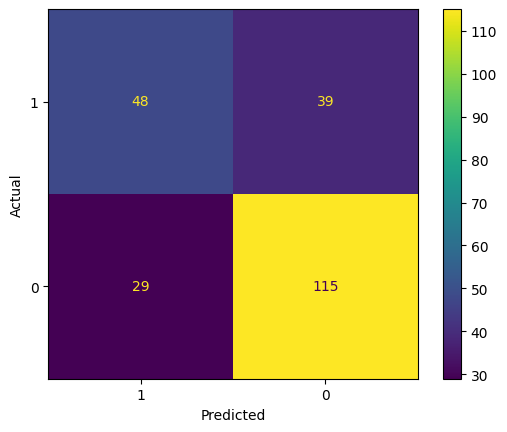

In [187]:

class_names= [1, 0]
dt_cm = confusion_matrix(y_test, y_pred, labels=[1,0])
dt_cmd = ConfusionMatrixDisplay(dt_cm, display_labels=class_names)
dt_cmd.plot()
dt_cmd.ax_.set(xlabel='Predicted', ylabel='Actual')

# [TP, FN]
# [FP, TN]


In [188]:
# Compute test set accuracy
dt_test_accuracy = round(accuracy_score(y_test, y_pred),2)
dt_test_accuracy

0.71

### Precision “exactness/corectness” : 

number of correct positive predictions made

def calculate_precision(tp,fp):
    return tp/(tp+fp)

In [189]:
dt_precision=round(precision_score(y_test,y_pred),2)
dt_precision

0.62

### Recall “completeness/Sensitivity”:

number of positive class made out of all positive examples in the dataset.

def calculate_recall(tp,fn):
    return tp/(tp+fn)

In [190]:
dt_recall=round(recall_score(y_test,y_pred),2)
dt_recall

0.55

### F1 score :

usually more useful than accuracy, especially if you have an uneven class distribution
(2*p*r)/(p+r)

In [214]:
#f1_score
dt_f1=round(f1_score(y_test,y_pred),2)
dt_f1

0.64

## 2. Random Forest Algorithm


In [192]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=25, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=0)

In [193]:
# Predict test set labels
y_pred = rf.predict(x_test)


### Evaluate  Random Forest Algorithm

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

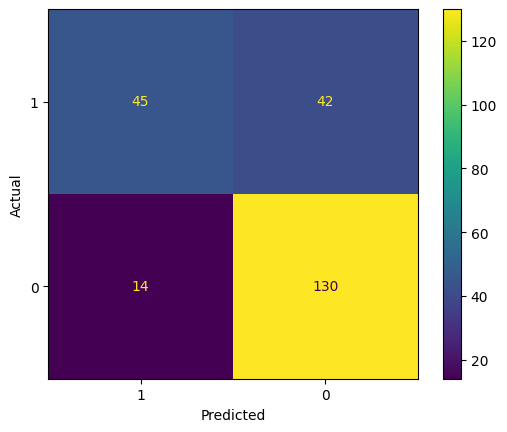

In [194]:
class_names= [1, 0]
rf_cm = confusion_matrix(y_test, y_pred, labels=[1,0])
rf_cmd = ConfusionMatrixDisplay(rf_cm, display_labels=class_names)
rf_cmd.plot()
rf_cmd.ax_.set(xlabel='Predicted', ylabel='Actual')

# [TP, FN]
# [FP, TN]


In [195]:
# Compute test set accuracy
rf_test_accuracy = round(accuracy_score(y_test, y_pred), 2)
rf_test_accuracy

0.76

In [196]:
rf_precision=round(precision_score(y_test,y_pred),2)
rf_precision

0.76

In [197]:
rf_recall=round(recall_score(y_test,y_pred),2)
rf_recall

0.52

In [198]:
#f1_score
rf_f1=round(f1_score(y_test,y_pred),2)
rf_f1

0.62

## 2. KNN

In [199]:
import math
math.sqrt(len(y_test))

15.198684153570664

In [200]:
from sklearn.neighbors import KNeighborsClassifier

knnClassifier = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
knnClassifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [201]:
y_pred = knnClassifier.predict(x_test)
y_pred

C:\Users\zquad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

### Evaluate KNN

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

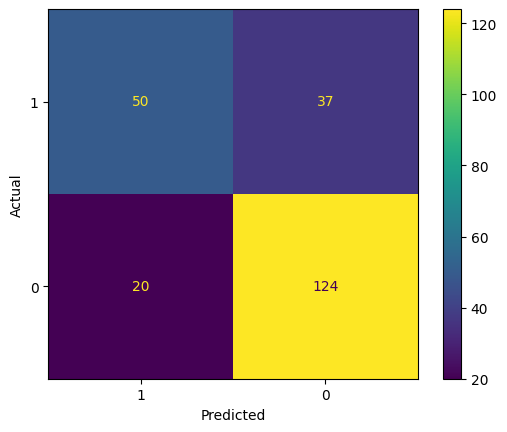

In [204]:
class_names= [1, 0]
knn_cm = confusion_matrix(y_test, y_pred, labels=[1,0])
knn_cmd = ConfusionMatrixDisplay(knn_cm, display_labels=class_names)
knn_cmd.plot()
knn_cmd.ax_.set(xlabel='Predicted', ylabel='Actual')

# [TP, FN]
# [FP, TN]


In [205]:
# Compute test set accuracy
knn_test_accuracy = round(accuracy_score(y_test, y_pred), 2)
knn_test_accuracy

0.75

In [206]:
knn_precision=round(precision_score(y_test,y_pred),2)
knn_precision

0.71

In [207]:
knn_recall=round(recall_score(y_test,y_pred),2)
knn_recall

0.57

In [208]:
#f1_score
knn_f1=round(f1_score(y_test,y_pred),2)
knn_f1

0.64

# Comparing performance of all the models

In [211]:
score_df = pd.DataFrame()

In [215]:

score_df['Model Names'] = pd.Series( [
    "Decision Tree",
    "KNN",
    "Random Forest",
])

score_df['Test Accuracy'] = pd.Series([
     dt_test_accuracy,
    knn_test_accuracy,
    rf_test_accuracy
])

score_df['Precision'] = pd.Series([
    dt_precision,
    knn_precision,
    rf_precision
])
score_df['Recall'] = pd.Series([
    dt_recall,
    knn_recall,
    rf_recall
])

score_df['F1'] = pd.Series([
    dt_f1,
    knn_f1,
    rf_f1
])



In [216]:
score_df.style.background_gradient(cmap='PuBu')